In [0]:
!unzip /content/drive/My\ Drive/ai/bird_dataset.zip 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# 将kaggle的数据集直接下载到codelab中
!pip install -U -q kaggle --upgrade
!mkdir -p ~/.kaggle
!echo '{"username":"codingchaozhang","key":"4f6ee69ad1970ff0c67499e6defcefb7"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c birds-classification

404 - Not Found


In [1]:
import os

train_set_dir = "train_set/"
val_set_dir = "val_set/"
test_set_dir = "test_set/"

print(len(os.listdir(train_set_dir)))
print(len(os.listdir(test_set_dir)))
print(len(os.listdir(test_set_dir)))

8251
1768
1768


### 探索数据

In [0]:
import os

bird_dir = "/content/"
x_train_path = os.path.join(bird_dir,"train_set")
x_test_path = os.path.join(bird_dir,"test_set")
x_valid_path = os.path.join(bird_dir,"val_set")

y_train_path = os.path.join(bird_dir,"train_pname_to_index.csv")
y_valid_path = os.path.join(bird_dir,"val_pname_to_index.csv")

In [0]:
import pandas as pd

y_train = pd.read_csv(y_train_path,skiprows=0)
y_valid = pd.read_csv(y_valid_path,skiprows=0)

In [4]:
y_train.head()

,img_path,label
0,163.Cape_May_Warbler_1.jpg,163
1,141.Artic_Tern_2.jpg,141
2,183.Northern_Waterthrush_3.jpg,183
3,068.Ruby_throated_Hummingbird_4.jpg,68
4,128.Seaside_Sparrow_5.jpg,128


In [5]:
y_valid.head()

,img_path,label
0,003.Sooty_Albatross_1.jpg,3
1,074.Florida_Jay_2.jpg,74
2,108.White_necked_Raven_3.jpg,108
3,024.Red_faced_Cormorant_4.jpg,24
4,003.Sooty_Albatross_5.jpg,3


In [6]:
x_train_img_path = y_train["img_path"]
y_train = y_train["label"] - 1
x_valid_img_path = y_valid["img_path"]
y_valid = y_valid["label"] -1

print(x_train_img_path[:5])
print(y_train[:5])

print(x_valid_img_path[:5])
print(y_valid[:5])

0             163.Cape_May_Warbler_1.jpg
1                   141.Artic_Tern_2.jpg
2         183.Northern_Waterthrush_3.jpg
3    068.Ruby_throated_Hummingbird_4.jpg
4              128.Seaside_Sparrow_5.jpg
Name: img_path, dtype: object
0    162
1    140
2    182
3     67
4    127
Name: label, dtype: int64
0        003.Sooty_Albatross_1.jpg
1            074.Florida_Jay_2.jpg
2     108.White_necked_Raven_3.jpg
3    024.Red_faced_Cormorant_4.jpg
4        003.Sooty_Albatross_5.jpg
Name: img_path, dtype: object
0      2
1     73
2    107
3     23
4      2
Name: label, dtype: int64


In [0]:
# 定义读取图片函数
import cv2
import numpy as np

def get_img(file_path,img_rows,img_cols):
  
    img = cv2.imread(file_path)
    img = cv2.resize(img,(img_rows,img_cols))
    if img.shape[2] == 1:
      img = np.dstack([img,img,img])
    else:
      img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)
    
    return img

In [0]:
# 加载训练集
x_train = []
for img_name in x_train_img_path:
    img = get_img(os.path.join(x_train_path,img_name),224,224)
    x_train.append(img)

x_train = np.array(x_train,np.float32)

In [0]:
# 加载验证集
x_valid = []
for img_name in x_valid_img_path:
    img = get_img(os.path.join(x_valid_path,img_name),224,224)
    x_valid.append(img)

x_valid = np.array(x_valid,np.float32)

In [ ]:
# 加载预测集
import re

x_test_img_path = os.listdir(x_test_path)
x_test_img_path = sorted(x_test_img_path,key = lambda i:int(re.match(r"(\d+)",i).group()))

print(x_test_img_path)

x_test = []
for img_name in x_test_img_path:
    img = get_img(os.path.join(x_test_path,img_name),224,224)
    x_test.append(img)

x_test = np.array(x_test,np.float32)

In [11]:
print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

print(x_test.shape)

(8251, 224, 224, 3)
(8251,)
(1768, 224, 224, 3)
(1768,)
(1768, 224, 224, 3)


162


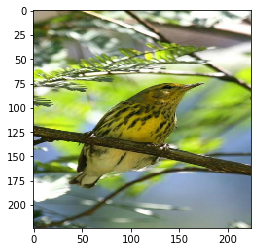

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0]/255)
print(y_train[0])

In [13]:
X_train = np.concatenate((x_train,x_valid),axis=0)
Y_train = np.concatenate((y_train,y_valid),axis=0)

print(X_train.shape)
print(Y_train.shape)


print(x_test.shape)

(10019, 224, 224, 3)
(10019,)
(1768, 224, 224, 3)


In [0]:
sum = np.unique(y_train)
n_classes = len(sum)

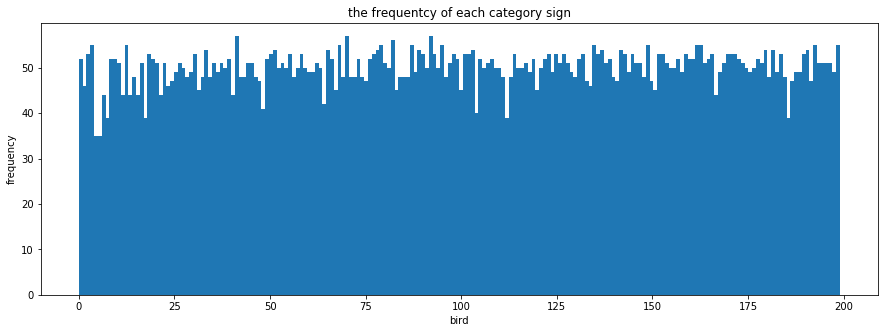

In [15]:
# 直方图来显示图像训练集的各个类别的分别情况
def plot_y_train_hist():
  fig = plt.figure(figsize=(15,5))
  ax = fig.add_subplot(1,1,1)
  hist = ax.hist(Y_train,bins=n_classes)
  ax.set_title("the frequentcy of each category sign")
  ax.set_xlabel("bird")
  ax.set_ylabel("frequency")
  plt.show()
  return hist

hist = plot_y_train_hist()

In [16]:
# 对标签数据进行one-hot编码

from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train,n_classes)
print("Shape after one-hot encoding:",Y_train.shape)

Using TensorFlow backend.


Shape after one-hot encoding: (10019, 200)


In [19]:
# 划分数据集
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid = train_test_split(X_train,Y_train,test_size=0.3,random_state=2019)



print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

print(x_test.shape)

(7013, 224, 224, 3)
(7013, 200)
(3006, 224, 224, 3)
(3006, 200)
(1768, 224, 224, 3)


### 模型

In [0]:
# 导入开发需要的库
from keras import optimizers, Input
from keras.applications import  imagenet_utils

from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.applications import *

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

In [0]:
# 绘制训练过程中的 loss 和 acc 变化曲线
import matplotlib.pyplot as plt
%matplotlib inline

def history_plot(history_fit):
    plt.figure(figsize=(12,6))
    
    # summarize history for accuracy
    plt.subplot(121)
    plt.plot(history_fit.history["acc"])
    plt.plot(history_fit.history["val_acc"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="upper left")
    
    # summarize history for loss
    plt.subplot(122)
    plt.plot(history_fit.history["loss"])
    plt.plot(history_fit.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    
    plt.show()

In [0]:
# fine-tune 模型
def fine_tune_model(model, optimizer, batch_size, epochs, freeze_num):
    '''
    discription: 对指定预训练模型进行fine-tune，并保存为.hdf5格式
    
    MODEL：传入的模型，VGG16， ResNet50, ...

    optimizer: fine-tune all layers 的优化器, first part默认用adadelta
    batch_size: 每一批的尺寸，建议32/64/128
    epochs: fine-tune all layers的代数
    freeze_num: first part冻结卷积层的数量
    '''

    # datagen = ImageDataGenerator(
    #     rescale=1.255,
    #     # shear_range=0.2,
    #     # zoom_range=0.2,
    #     # horizontal_flip=True,
    #     # vertical_flip=True,
    #     # fill_mode="nearest"
    #   )
    
    # datagen.fit(X_train)
    
    
#     # first: 仅训练全连接层（权重随机初始化的）
#     # 冻结所有卷积层
    
    # for layer in model.layers[:freeze_num]:
    #     layer.trainable = False
    
    # model.compile(optimizer=optimizer, 
    #               loss="categorical_crossentropy",
    #               metrics=["accuracy"])

    # # model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
    # #                     steps_per_epoch=len(x_train)/32,
    # #                     epochs=3,
    # #                     shuffle=True,
    # #                     verbose=1,
    # #                     datagen.flow(x_valid, y_valid))
    # model.fit(X_train,
    #      Y_train,
    #      batch_size=batch_size,
    #      epochs=3,
    #      shuffle=True,
    #      verbose=1,
    #      validation_split=0.3
    #     )
    # print('Finish step_1')
    
    
    # second: fine-tune all layers
    for layer in model.layers[:]:
        layer.trainable = True
    
    rc = ReduceLROnPlateau(monitor="val_loss",
                factor=0.2,
                patience=3,
                verbose=1,
                mode='min')

    model_name = model.name  + ".hdf5"
    mc = ModelCheckpoint(model_name, 
               monitor="val_loss", 
               save_best_only=True,
               verbose=1,
               mode='min')
    el = EarlyStopping(monitor="val_loss",
              min_delta=0,
              patience=5,
              verbose=1,
              restore_best_weights=True)
    
    model.compile(optimizer=optimizer, 
           loss='categorical_crossentropy', 
           metrics=["accuracy"])

    # history_fit = model.fit_generator(datagen.flow(x_train,y_train,batch_size=32),
    #                                  steps_per_epoch=len(x_train)/32,
    #                                  epochs=epochs,
    #                                  shuffle=True,
    #                                  verbose=1,
    #                                  callbacks=[mc,rc,el],
    #                                  datagen.flow(x_valid, y_valid))
    history_fit = model.fit(X_train,
                 Y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 shuffle=True,
                 verbose=1,
                 validation_split=0.3,
                 callbacks=[mc,rc,el])
    
    print('Finish fine-tune')
    return history_fit

In [0]:
# 定义一个VGG16的模型
def vgg16_model(img_rows,img_cols):
  x = Input(shape=(img_rows, img_cols, 3))
  x = Lambda(imagenet_utils.preprocess_input)(x)
  base_model = VGG16(input_tensor=x,weights="imagenet",include_top=False, pooling='avg')
  x = base_model.output
  x = Dense(1024,activation="relu",name="fc1")(x)
  x = Dropout(0.5)(x)
  predictions = Dense(n_classes,activation="softmax",name="predictions")(x)

  vgg16_model = Model(inputs=base_model.input,outputs=predictions,name="vgg16")
  
  return vgg16_model

In [0]:
# 创建VGG16模型
img_rows, img_cols = 224, 224
vgg16_model = vgg16_model(img_rows,img_cols)

In [35]:
for i,layer in enumerate(vgg16_model.layers):
  print(i,layer.name)

0 input_3
1 lambda_3
2 block1_conv1
3 block1_conv2
4 block1_pool
5 block2_conv1
6 block2_conv2
7 block2_pool
8 block3_conv1
9 block3_conv2
10 block3_conv3
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_pool
16 block5_conv1
17 block5_conv2
18 block5_conv3
19 block5_pool
20 global_average_pooling2d_3
21 fc1
22 dropout_3
23 predictions


In [36]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________

In [37]:
optimizer = optimizers.Adam(lr=0.0001)
batch_size = 32
epochs = 30
freeze_num = 21


%time vgg16_history = fine_tune_model(vgg16_model,optimizer,batch_size,epochs,freeze_num)

Train on 7013 samples, validate on 3006 samples
Epoch 1/15
7013/7013 [==============================] - 26s 4ms/step - loss: 9.1793 - acc: 0.0165 - val_loss: 4.8127 - val_acc: 0.0745
Epoch 2/15
7013/7013 [==============================] - 26s 4ms/step - loss: 5.0067 - acc: 0.0659 - val_loss: 4.0479 - val_acc: 0.1474
Epoch 3/15
7013/7013 [==============================] - 26s 4ms/step - loss: 4.0781 - acc: 0.1379 - val_loss: 3.4662 - val_acc: 0.2379
Epoch 4/15
7013/7013 [==============================] - 26s 4ms/step - loss: 3.4273 - acc: 0.2294 - val_loss: 2.9841 - val_acc: 0.3061
Epoch 5/15
7013/7013 [==============================] - 26s 4ms/step - loss: 2.9164 - acc: 0.3091 - val_loss: 2.6380 - val_acc: 0.3676
Epoch 6/15
7013/7013 [==============================] - 26s 4ms/step - loss: 2.4919 - acc: 0.3869 - val_loss: 2.4137 - val_acc: 0.4098
Epoch 7/15
7013/7013 [==============================] - 26s 4ms/step - loss: 2.1456 - acc: 0.4512 - val_loss: 2.2486 - val_acc: 0.4385
Epoch 8

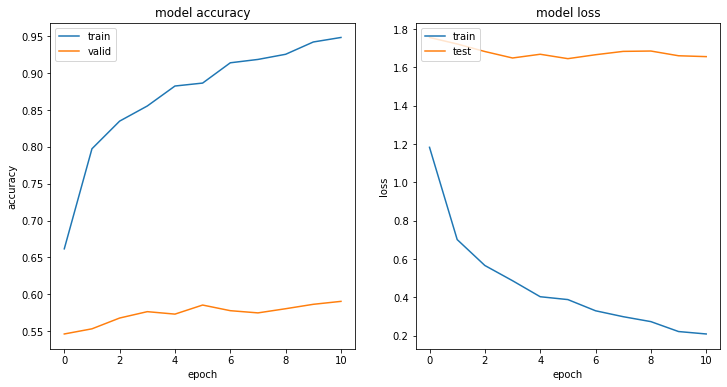

In [38]:
history_plot(vgg16_history)

In [20]:
!pip install -U efficientnet

Requirement already up-to-date: efficientnet in /usr/local/lib/python3.6/dist-packages (1.0.0)


In [0]:
# 导入Efficient模块
from efficientnet.keras import EfficientNetB3
import keras.backend as K

In [0]:
# 定义一个EfficientNet模型
def efficient_model(img_rows,img_cols):
  K.clear_session()
  x = Input(shape=(img_rows,img_cols,3))
  x = Lambda(imagenet_utils.preprocess_input)(x)
  
  base_model = EfficientNetB3(input_tensor=x,weights="imagenet",include_top=False,pooling="avg")
  x = base_model.output
  x = Dense(1024,activation="relu",name="fc1")(x)
  x = Dropout(0.5)(x)
  predictions = Dense(n_classes,activation="softmax",name="predictions")(x)

  eB_model = Model(inputs=base_model.input,outputs=predictions,name="eB3")

  return eB_model

In [23]:
# 创建Efficient模型
img_rows,img_cols=224,224
eB_model = efficient_model(img_rows,img_cols)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
44113920/44107200 [==============================] - 1s 0us/step



In [24]:
for i,layer in enumerate(eB_model.layers):
  print(i,layer.name)

0 input_1
1 lambda_1
2 stem_conv
3 stem_bn
4 stem_activation
5 block1a_dwconv
6 block1a_bn
7 block1a_activation
8 block1a_se_squeeze
9 block1a_se_reshape
10 block1a_se_reduce
11 block1a_se_expand
12 block1a_se_excite
13 block1a_project_conv
14 block1a_project_bn
15 block1b_dwconv
16 block1b_bn
17 block1b_activation
18 block1b_se_squeeze
19 block1b_se_reshape
20 block1b_se_reduce
21 block1b_se_expand
22 block1b_se_excite
23 block1b_project_conv
24 block1b_project_bn
25 block1b_drop
26 block1b_add
27 block2a_expand_conv
28 block2a_expand_bn
29 block2a_expand_activation
30 block2a_dwconv
31 block2a_bn
32 block2a_activation
33 block2a_se_squeeze
34 block2a_se_reshape
35 block2a_se_reduce
36 block2a_se_expand
37 block2a_se_excite
38 block2a_project_conv
39 block2a_project_bn
40 block2b_expand_conv
41 block2b_expand_bn
42 block2b_expand_activation
43 block2b_dwconv
44 block2b_bn
45 block2b_activation
46 block2b_se_squeeze
47 block2b_se_reshape
48 block2b_se_reduce
49 block2b_se_expand
50 blo

In [25]:
eB_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 40) 1080        lambda_1[0][0]                   
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 40) 160         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activ

In [26]:
optimizer = optimizers.Adam(lr=0.0001)
batch_size = 32
epochs = 30
freeze_num = 379
eB_model_history  = fine_tune_model(eB_model,optimizer,batch_size,epochs,freeze_num)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7013 samples, validate on 3006 samples
Epoch 1/15
7013/7013 [==============================] - 39s 6ms/step - loss: 16.0292 - acc: 0.0051 - val_loss: 15.9832 - val_acc: 0.0073
Epoch 2/15
7013/7013 [==============================] - 30s 4ms/step - loss: 16.0327 - acc: 0.0050 - val_loss: 16.0377 - val_acc: 0.0050
Epoch 3/15
7013/7013 [==============================] - 30s 4ms/step - loss: 16.0423 - acc: 0.0047 - val_loss: 16.0377 - val_acc: 0.0050
Epoch 4/15
7013/7013 [==============================] - 30s 4ms/step - loss: 16.0423 - acc: 0.0047 - val_loss: 16.0377 - val_acc: 0.0050
Epoch 5/15
7013/7013 [==============================] - 30s 4ms/step - loss: 16.0423 - acc: 0.0047 - val_loss: 16.0377 - val_acc: 0.0050
Epoch 6/15
7013/7013 [==============================] - 30s 4ms/step - loss: 16.0392 - acc: 0.0047 - val_loss: 16.0377 - val_acc: 0.0050
Epoch 7/15
7013/7013 [==========

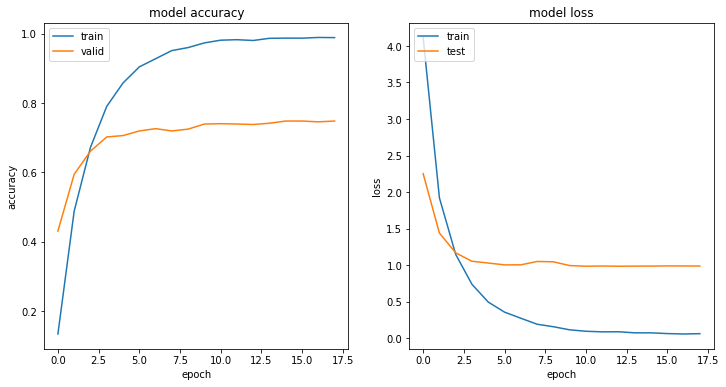

In [27]:
history_plot(eB_model_history)

In [0]:
# 导入模块
from efficientnet.keras import EfficientNetB3
import keras.backend as K

In [0]:
# 定义一个加入Attention模块的Efficient网络架构即efficientnet-with-attention

def efficient_attention_model(img_rows,img_cols):
  K.clear_session()
  
  in_lay = Input(shape=(img_rows,img_cols,3))
  base_model = EfficientNetB3(input_shape=(img_rows,img_cols,3),weights="imagenet",include_top=False)

  pt_depth = base_model.get_output_shape_at(0)[-1]

  pt_features = base_model(in_lay)
  bn_features = BatchNormalization()(pt_features)

  # here we do an attention mechanism to turn pixels in the GAP on an off
  atten_layer = Conv2D(64,kernel_size=(1,1),padding="same",activation="relu")(Dropout(0.5)(bn_features))
  atten_layer = Conv2D(16,kernel_size=(1,1),padding="same",activation="relu")(atten_layer)
  atten_layer = Conv2D(8,kernel_size=(1,1),padding="same",activation="relu")(atten_layer)
  atten_layer = Conv2D(1,kernel_size=(1,1),padding="valid",activation="sigmoid")(atten_layer)# H,W,1
  # fan it out to all of the channels
  up_c2_w = np.ones((1,1,1,pt_depth)) #1,1,C
  up_c2 = Conv2D(pt_depth,kernel_size=(1,1),padding="same",activation="linear",use_bias=False,weights=[up_c2_w])
  up_c2.trainable = False
  atten_layer = up_c2(atten_layer)# H,W,C

  mask_features = multiply([atten_layer,bn_features])# H,W,C

  gap_features = GlobalAveragePooling2D()(mask_features)# 1,1,C
  # gap_mask = GlobalAveragePooling2D()(atten_layer)# 1,1,C

  # # to account for missing values from the attention model
  # gap = Lambda(lambda x:x[0]/x[1],name="RescaleGAP")([gap_features,gap_mask])
  gap_dr = Dropout(0.25)(gap_features)
  dr_steps = Dropout(0.25)(Dense(1000,activation="relu")(gap_dr))
  out_layer = Dense(n_classes,activation="softmax")(dr_steps)
  eb_atten_model = Model(inputs=[in_lay],outputs=[out_layer])

  return eb_atten_model

In [0]:
img_rows,img_cols = 224,224
eB_atten_model = efficient_attention_model(img_rows,img_cols)

In [51]:
for i,layer in enumerate(eB_atten_model.layers):
  print(i,layer.name)

0 input_1
1 efficientnet-b3
2 batch_normalization_1
3 dropout_1
4 conv2d_1
5 conv2d_2
6 conv2d_3
7 conv2d_4
8 conv2d_5
9 multiply_1
10 global_average_pooling2d_1
11 dropout_2
12 dense_1
13 dropout_3
14 dense_2


In [47]:
eB_atten_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
efficientnet-b3 (Model)         (None, 7, 7, 1536)   10783528    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 7, 7, 1536)   6144        efficientnet-b3[1][0]            
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 7, 7, 1536)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_1 (

In [52]:
optimizer = optimizers.Adam(lr=0.0001)
batch_size = 32
epochs = 30
freeze_num = 12
eB_model_history  = fine_tune_model(eB_atten_model,optimizer,batch_size,epochs,freeze_num)

Train on 7013 samples, validate on 3006 samples
Epoch 1/30
7013/7013 [==============================] - 141s 20ms/step - loss: 4.9907 - acc: 0.0476 - val_loss: 3.8750 - val_acc: 0.2302

Epoch 00001: val_loss improved from inf to 3.87502, saving model to model_1.hdf5
Epoch 2/30
7013/7013 [==============================] - 108s 15ms/step - loss: 3.0265 - acc: 0.3401 - val_loss: 1.9067 - val_acc: 0.5502

Epoch 00002: val_loss improved from 3.87502 to 1.90674, saving model to model_1.hdf5
Epoch 3/30
7013/7013 [==============================] - 108s 15ms/step - loss: 1.6109 - acc: 0.5939 - val_loss: 1.2737 - val_acc: 0.6617

Epoch 00003: val_loss improved from 1.90674 to 1.27369, saving model to model_1.hdf5
Epoch 4/30
7013/7013 [==============================] - 108s 15ms/step - loss: 1.0175 - acc: 0.7295 - val_loss: 1.0536 - val_acc: 0.7053

Epoch 00004: val_loss improved from 1.27369 to 1.05363, saving model to model_1.hdf5
Epoch 5/30
7013/7013 [==============================] - 108s 15m

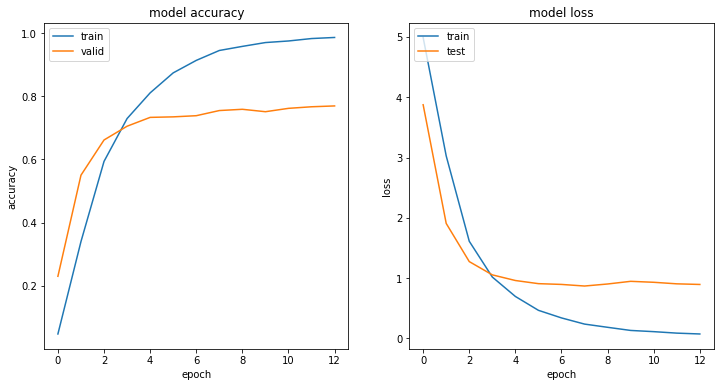

In [53]:
history_plot(eB_model_history)

In [0]:
# 定义双线性VGG16模型

from keras import backend as K

def batch_dot(cnn_ab):
    return K.batch_dot(cnn_ab[0], cnn_ab[1], axes=[1, 1])

def sign_sqrt(x):
    return K.sign(x) * K.sqrt(K.abs(x) + 1e-10)

def l2_norm(x):
    return K.l2_normalize(x, axis=-1)
 
 
def  bilinear_vgg16(img_rows,img_cols):
    input_tensor = Input(shape=(img_rows,img_cols,3))
    input_tensor = Lambda(imagenet_utils.preprocess_input)(input_tensor)

    model_vgg16 = VGG16(include_top=False, weights="imagenet",
                        input_tensor=input_tensor,pooling="avg")
    
    cnn_out_a = model_vgg16.layers[-2].output
    cnn_out_shape = model_vgg16.layers[-2].output_shape  #? 7 7 128
    cnn_out_a = Reshape([cnn_out_shape[1]*cnn_out_shape[2],
                         cnn_out_shape[-1]])(cnn_out_a) #? 49, 128

    cnn_out_b = cnn_out_a

    cnn_out_dot = Lambda(batch_dot)([cnn_out_a, cnn_out_b]) # ? 49,128
    cnn_out_dot = Reshape([cnn_out_shape[-1]*cnn_out_shape[-1]])(cnn_out_dot) #? 128*128
 
    sign_sqrt_out = Lambda(sign_sqrt)(cnn_out_dot)
    l2_norm_out = Lambda(l2_norm)(sign_sqrt_out)
    
    fc1 = Dense(1024,activation="relu",name="fc1")(l2_norm_out)
    dropout = Dropout(0.5)(fc1)
    output = Dense(n_classes, activation="softmax",name="output")(dropout)
    bvgg16_model = Model(inputs=model_vgg16.input, outputs=output,name="bvgg16")

    return bvgg16_model


In [0]:
# 创建双线性VGG16模型
img_rows,img_cols = 224,224
bvgg16_model = bilinear_vgg16(img_rows,img_cols)





58892288/58889256 [==============================] - 1s 0us/step







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
for i,layer in enumerate(bvgg16_model.layers):
  print(i,layer.name)

0 input_1
1 lambda_1
2 block1_conv1
3 block1_conv2
4 block1_pool
5 block2_conv1
6 block2_conv2
7 block2_pool
8 block3_conv1
9 block3_conv2
10 block3_conv3
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_pool
16 block5_conv1
17 block5_conv2
18 block5_conv3
19 block5_pool
20 reshape_1
21 lambda_2
22 reshape_2
23 lambda_3
24 lambda_4
25 fc1
26 dropout_1
27 output


In [0]:
optimizer = optimizers.Adam(lr=0.0001)
batch_size = 32
epochs = 100
freeze_num = 25
bvgg16_history = fine_tune_model(bvgg16_model,optimizer,batch_size,epochs,freeze_num)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7013 samples, validate on 3006 samples
Epoch 1/15
7013/7013 [==============================] - 57s 8ms/step - loss: 5.1590 - acc: 0.0523 - val_loss: 4.9525 - val_acc: 0.1464
Epoch 2/15
7013/7013 [==============================] - 47s 7ms/step - loss: 4.6245 - acc: 0.1620 - val_loss: 4.3345 - val_acc: 0.2568
Epoch 3/15
7013/7013 [==============================] - 47s 7ms/step - loss: 3.9399 - acc: 0.2531 - val_loss: 3.6890 - val_acc: 0.3400
Epoch 4/15
7013/7013 [==============================] - 47s 7ms/step - loss: 3.3454 - acc: 0.3320 - val_loss: 3.1810 - val_acc: 0.4245
Epoch 5/15
7013/7013 [==============================] - 47s 7ms/step - loss: 2.8920 - acc: 0.3961 - val_loss: 2.8091 - val_acc: 0.4747
Epoch 6/15
7013/7013 [==============================] - 47s 7ms/step - loss: 2.5429 - acc: 0.4524 - val_loss: 2.5352 - val_acc: 0.5020
Epoch 7/15
7013/7013 [======================

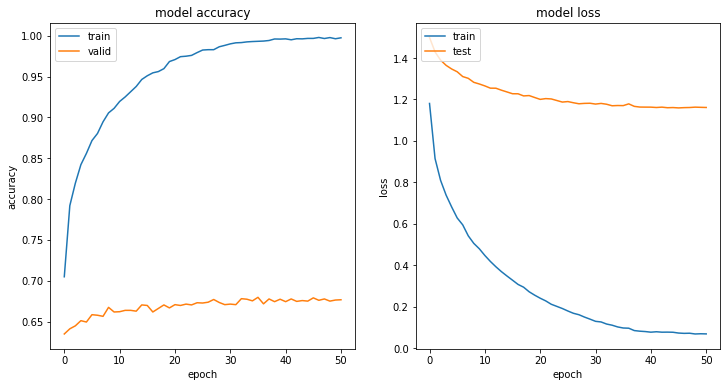

In [0]:
history_plot(bvgg16_history)

### ================================